In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pharma-sales-data/salesdaily.csv
/kaggle/input/pharma-sales-data/salesweekly.csv
/kaggle/input/pharma-sales-data/salesmonthly.csv
/kaggle/input/pharma-sales-data/saleshourly.csv


In [2]:
df=pd.read_csv("/kaggle/input/pharma-sales-data/salesweekly.csv")

In [3]:
df

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,1/5/2014,14.00,11.670,21.30,185.950,41.0,0.0,32.000000,7.00
1,1/12/2014,29.33,12.680,37.90,190.700,88.0,5.0,21.000000,7.20
2,1/19/2014,30.67,26.340,45.90,218.400,80.0,8.0,29.000000,12.00
3,1/26/2014,34.00,32.370,31.50,179.600,80.0,8.0,23.000000,10.00
4,2/2/2014,31.02,23.350,20.70,159.880,84.0,12.0,29.000000,12.00
...,...,...,...,...,...,...,...,...,...
297,9/15/2019,35.51,30.977,19.65,178.375,67.2,5.0,30.000000,30.50
298,9/22/2019,46.84,25.396,24.40,248.250,31.2,3.0,26.000000,21.00
299,9/29/2019,34.01,22.498,26.60,336.700,61.2,1.0,40.416667,23.10
300,10/6/2019,38.70,32.502,19.25,249.450,69.0,5.0,30.000000,12.13


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
# from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, roc_curve, auc, r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

2024-04-11 19:54:18.967181: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 19:54:18.967282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 19:54:19.098572: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import RootMeanSquaredError
import plotly.express as px

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df=pd.read_csv('/kaggle/input/pharma-sales-data/salesweekly.csv')

In [8]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,1/5/2014,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0
1,1/12/2014,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2
2,1/19/2014,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0
3,1/26/2014,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0
4,2/2/2014,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0


In [9]:
df.shape

(302, 9)

In [10]:
df.isnull().sum()

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64

In [11]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='M01AB', color_discrete_sequence=['blue'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()

In [12]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='M01AE', color_discrete_sequence=['green'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()


In [13]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='N02BA', color_discrete_sequence=['red'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()

In [14]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='N02BE', color_discrete_sequence=['orange'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()

In [15]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='N05B', color_discrete_sequence=['brown'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()

In [16]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='M01AE', color_discrete_sequence=['pink'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()

In [17]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='M01AE', color_discrete_sequence=['orange'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()

In [18]:
# Assuming 'df' is your DataFrame containing the data
fig = px.line(df, x='datum', y='M01AE', color_discrete_sequence=['violet'])
fig.update_layout(title='Quantity of M01AB over time')
fig.show()

# grouping of the data

In [19]:
# group sales data by ATC categories and store the aggregated 
# results in a dictionary for further analysis or processing.
atc_categories = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']
category_sales = {}
for category in atc_categories:
    category_sales[category] = df.groupby(category).sum()

In [20]:
# Assuming 'salesdaily' is your DataFrame and 'datum' column contains dates as strings
df['datum'] = pd.to_datetime(df['datum'])

In [21]:
print(df['datum'].min())
print(df['datum'].max())


2014-01-05 00:00:00
2019-10-13 00:00:00


# reshape the data

In [22]:
df_m01ab = df[['datum','M01AB']]
df_m01ab

,datum,M01AB
0,2014-01-05,14.00
1,2014-01-12,29.33
2,2014-01-19,30.67
3,2014-01-26,34.00
4,2014-02-02,31.02
...,...,...
297,2019-09-15,35.51
298,2019-09-22,46.84
299,2019-09-29,34.01
300,2019-10-06,38.70


In [23]:
# Reshape the dataframe
df_new1 = df_m01ab.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new1

,datum,Drug,Quantity
0,2014-01-05,M01AB,14.00
1,2014-01-12,M01AB,29.33
2,2014-01-19,M01AB,30.67
3,2014-01-26,M01AB,34.00
4,2014-02-02,M01AB,31.02
...,...,...,...
297,2019-09-15,M01AB,35.51
298,2019-09-22,M01AB,46.84
299,2019-09-29,M01AB,34.01
300,2019-10-06,M01AB,38.70


In [24]:
# Label encode 'Drug' column and add 0 to each encoded value
df_new1['Drug'] = le.fit_transform(df_new1['Drug'])

# Display the modified DataFrame
print(df_new1)

         datum  Drug  Quantity
0   2014-01-05     0     14.00
1   2014-01-12     0     29.33
2   2014-01-19     0     30.67
3   2014-01-26     0     34.00
4   2014-02-02     0     31.02
..         ...   ...       ...
297 2019-09-15     0     35.51
298 2019-09-22     0     46.84
299 2019-09-29     0     34.01
300 2019-10-06     0     38.70
301 2019-10-13     0      7.67

[302 rows x 3 columns]


In [25]:
# Create a new index column
df_new1['Index'] = range(len(df_new1))

# Set 'Index' as the index
df_new1.set_index('Index', inplace=True)

df_new1

,datum,Drug,Quantity
Index,,,
0,2014-01-05,0,14.00
1,2014-01-12,0,29.33
2,2014-01-19,0,30.67
3,2014-01-26,0,34.00
4,2014-02-02,0,31.02
...,...,...,...
297,2019-09-15,0,35.51
298,2019-09-22,0,46.84
299,2019-09-29,0,34.01


In [26]:
df_m01ae = df[['datum','M01AE']]
df_m01ae

,datum,M01AE
0,2014-01-05,11.670
1,2014-01-12,12.680
2,2014-01-19,26.340
3,2014-01-26,32.370
4,2014-02-02,23.350
...,...,...
297,2019-09-15,30.977
298,2019-09-22,25.396
299,2019-09-29,22.498
300,2019-10-06,32.502


In [27]:
# Reshape the dataframe
df_new2 = df_m01ae.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new2

,datum,Drug,Quantity
0,2014-01-05,M01AE,11.670
1,2014-01-12,M01AE,12.680
2,2014-01-19,M01AE,26.340
3,2014-01-26,M01AE,32.370
4,2014-02-02,M01AE,23.350
...,...,...,...
297,2019-09-15,M01AE,30.977
298,2019-09-22,M01AE,25.396
299,2019-09-29,M01AE,22.498
300,2019-10-06,M01AE,32.502


In [28]:
# Label encode 'Drug' column and add 1 to each encoded value
df_new2['Drug'] = le.fit_transform(df_new2['Drug']) + 1

# Display the modified DataFrame
print(df_new2)

         datum  Drug  Quantity
0   2014-01-05     1    11.670
1   2014-01-12     1    12.680
2   2014-01-19     1    26.340
3   2014-01-26     1    32.370
4   2014-02-02     1    23.350
..         ...   ...       ...
297 2019-09-15     1    30.977
298 2019-09-22     1    25.396
299 2019-09-29     1    22.498
300 2019-10-06     1    32.502
301 2019-10-13     1     6.237

[302 rows x 3 columns]


In [29]:
# Create a new index column
df_new2['Index'] = range(len(df_new2))
# Set 'Index' as the index
df_new2.set_index('Index', inplace=True)

df_new2

,datum,Drug,Quantity
Index,,,
0,2014-01-05,1,11.670
1,2014-01-12,1,12.680
2,2014-01-19,1,26.340
3,2014-01-26,1,32.370
4,2014-02-02,1,23.350
...,...,...,...
297,2019-09-15,1,30.977
298,2019-09-22,1,25.396
299,2019-09-29,1,22.498


In [30]:
df_n02ba = df[['datum','N02BA']]
df_n02ba

,datum,N02BA
0,2014-01-05,21.30
1,2014-01-12,37.90
2,2014-01-19,45.90
3,2014-01-26,31.50
4,2014-02-02,20.70
...,...,...
297,2019-09-15,19.65
298,2019-09-22,24.40
299,2019-09-29,26.60
300,2019-10-06,19.25


In [31]:
# Reshape the dataframe
df_new3 = df_n02ba.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new3

,datum,Drug,Quantity
0,2014-01-05,N02BA,21.30
1,2014-01-12,N02BA,37.90
2,2014-01-19,N02BA,45.90
3,2014-01-26,N02BA,31.50
4,2014-02-02,N02BA,20.70
...,...,...,...
297,2019-09-15,N02BA,19.65
298,2019-09-22,N02BA,24.40
299,2019-09-29,N02BA,26.60
300,2019-10-06,N02BA,19.25


In [32]:
# Label encode 'Drug' column and add 1 to each encoded value
df_new3['Drug'] = le.fit_transform(df_new3['Drug']) + 2

# Display the modified DataFrame
print(df_new3)

         datum  Drug  Quantity
0   2014-01-05     2     21.30
1   2014-01-12     2     37.90
2   2014-01-19     2     45.90
3   2014-01-26     2     31.50
4   2014-02-02     2     20.70
..         ...   ...       ...
297 2019-09-15     2     19.65
298 2019-09-22     2     24.40
299 2019-09-29     2     26.60
300 2019-10-06     2     19.25
301 2019-10-13     2      3.50

[302 rows x 3 columns]


In [33]:
# Create a new index column
df_new3['Index'] = range(len(df_new3))

# Set 'Index' as the index
df_new3.set_index('Index', inplace=True)

df_new3

,datum,Drug,Quantity
Index,,,
0,2014-01-05,2,21.30
1,2014-01-12,2,37.90
2,2014-01-19,2,45.90
3,2014-01-26,2,31.50
4,2014-02-02,2,20.70
...,...,...,...
297,2019-09-15,2,19.65
298,2019-09-22,2,24.40
299,2019-09-29,2,26.60


In [34]:
df_n02be = df[['datum','N02BE']]
df_n02be

,datum,N02BE
0,2014-01-05,185.950
1,2014-01-12,190.700
2,2014-01-19,218.400
3,2014-01-26,179.600
4,2014-02-02,159.880
...,...,...
297,2019-09-15,178.375
298,2019-09-22,248.250
299,2019-09-29,336.700
300,2019-10-06,249.450


In [35]:
# Reshape the dataframe
df_new4 = df_n02be.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new4

,datum,Drug,Quantity
0,2014-01-05,N02BE,185.950
1,2014-01-12,N02BE,190.700
2,2014-01-19,N02BE,218.400
3,2014-01-26,N02BE,179.600
4,2014-02-02,N02BE,159.880
...,...,...,...
297,2019-09-15,N02BE,178.375
298,2019-09-22,N02BE,248.250
299,2019-09-29,N02BE,336.700
300,2019-10-06,N02BE,249.450


In [36]:
# Label encode 'Drug' column and add 1 to each encoded value
df_new4['Drug'] = le.fit_transform(df_new4['Drug']) + 3

# Display the modified DataFrame
print(df_new4)

         datum  Drug  Quantity
0   2014-01-05     3   185.950
1   2014-01-12     3   190.700
2   2014-01-19     3   218.400
3   2014-01-26     3   179.600
4   2014-02-02     3   159.880
..         ...   ...       ...
297 2019-09-15     3   178.375
298 2019-09-22     3   248.250
299 2019-09-29     3   336.700
300 2019-10-06     3   249.450
301 2019-10-13     3    95.100

[302 rows x 3 columns]


In [37]:
# Create a new index column
df_new4['Index'] = range(len(df_new4))

# Set 'Index' as the index
df_new4.set_index('Index', inplace=True)

df_new4

,datum,Drug,Quantity
Index,,,
0,2014-01-05,3,185.950
1,2014-01-12,3,190.700
2,2014-01-19,3,218.400
3,2014-01-26,3,179.600
4,2014-02-02,3,159.880
...,...,...,...
297,2019-09-15,3,178.375
298,2019-09-22,3,248.250
299,2019-09-29,3,336.700


In [38]:
df_n05b = df[['datum','N02BE']]
df_n05b

,datum,N02BE
0,2014-01-05,185.950
1,2014-01-12,190.700
2,2014-01-19,218.400
3,2014-01-26,179.600
4,2014-02-02,159.880
...,...,...
297,2019-09-15,178.375
298,2019-09-22,248.250
299,2019-09-29,336.700
300,2019-10-06,249.450


In [39]:
# Reshape the dataframe
df_new5 = df_n02be.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new5

,datum,Drug,Quantity
0,2014-01-05,N02BE,185.950
1,2014-01-12,N02BE,190.700
2,2014-01-19,N02BE,218.400
3,2014-01-26,N02BE,179.600
4,2014-02-02,N02BE,159.880
...,...,...,...
297,2019-09-15,N02BE,178.375
298,2019-09-22,N02BE,248.250
299,2019-09-29,N02BE,336.700
300,2019-10-06,N02BE,249.450


In [40]:
# Label encode 'Drug' column and add 1 to each encoded value
df_new5['Drug'] = le.fit_transform(df_new5['Drug']) + 4

# Display the modified DataFrame
print(df_new5)

         datum  Drug  Quantity
0   2014-01-05     4   185.950
1   2014-01-12     4   190.700
2   2014-01-19     4   218.400
3   2014-01-26     4   179.600
4   2014-02-02     4   159.880
..         ...   ...       ...
297 2019-09-15     4   178.375
298 2019-09-22     4   248.250
299 2019-09-29     4   336.700
300 2019-10-06     4   249.450
301 2019-10-13     4    95.100

[302 rows x 3 columns]


In [41]:
# Create a new index column
df_new5['Index'] = range(len(df_new5))

# Set 'Index' as the index
df_new5.set_index('Index', inplace=True)

df_new5

,datum,Drug,Quantity
Index,,,
0,2014-01-05,4,185.950
1,2014-01-12,4,190.700
2,2014-01-19,4,218.400
3,2014-01-26,4,179.600
4,2014-02-02,4,159.880
...,...,...,...
297,2019-09-15,4,178.375
298,2019-09-22,4,248.250
299,2019-09-29,4,336.700


In [42]:
df_n05c = df[['datum','N05C']]
df_n05c

,datum,N05C
0,2014-01-05,0.0
1,2014-01-12,5.0
2,2014-01-19,8.0
3,2014-01-26,8.0
4,2014-02-02,12.0
...,...,...
297,2019-09-15,5.0
298,2019-09-22,3.0
299,2019-09-29,1.0
300,2019-10-06,5.0


In [43]:
# Reshape the dataframe
df_new6 = df_n05c.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new6

,datum,Drug,Quantity
0,2014-01-05,N05C,0.0
1,2014-01-12,N05C,5.0
2,2014-01-19,N05C,8.0
3,2014-01-26,N05C,8.0
4,2014-02-02,N05C,12.0
...,...,...,...
297,2019-09-15,N05C,5.0
298,2019-09-22,N05C,3.0
299,2019-09-29,N05C,1.0
300,2019-10-06,N05C,5.0


In [44]:
# Label encode 'Drug' column and add 1 to each encoded value
df_new6['Drug'] = le.fit_transform(df_new6['Drug']) + 5

# Display the modified DataFrame
print(df_new6)

         datum  Drug  Quantity
0   2014-01-05     5       0.0
1   2014-01-12     5       5.0
2   2014-01-19     5       8.0
3   2014-01-26     5       8.0
4   2014-02-02     5      12.0
..         ...   ...       ...
297 2019-09-15     5       5.0
298 2019-09-22     5       3.0
299 2019-09-29     5       1.0
300 2019-10-06     5       5.0
301 2019-10-13     5       2.0

[302 rows x 3 columns]


In [45]:
# Create a new index column
df_new6['Index'] = range(len(df_new6))

# Set 'Index' as the index
df_new6.set_index('Index', inplace=True)

df_new6

,datum,Drug,Quantity
Index,,,
0,2014-01-05,5,0.0
1,2014-01-12,5,5.0
2,2014-01-19,5,8.0
3,2014-01-26,5,8.0
4,2014-02-02,5,12.0
...,...,...,...
297,2019-09-15,5,5.0
298,2019-09-22,5,3.0
299,2019-09-29,5,1.0


In [46]:
df_r03 = df[['datum','R03']]
df_r03

,datum,R03
0,2014-01-05,32.000000
1,2014-01-12,21.000000
2,2014-01-19,29.000000
3,2014-01-26,23.000000
4,2014-02-02,29.000000
...,...,...
297,2019-09-15,30.000000
298,2019-09-22,26.000000
299,2019-09-29,40.416667
300,2019-10-06,30.000000


In [47]:
# Reshape the dataframe
df_new7 = df_r03.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new7

,datum,Drug,Quantity
0,2014-01-05,R03,32.000000
1,2014-01-12,R03,21.000000
2,2014-01-19,R03,29.000000
3,2014-01-26,R03,23.000000
4,2014-02-02,R03,29.000000
...,...,...,...
297,2019-09-15,R03,30.000000
298,2019-09-22,R03,26.000000
299,2019-09-29,R03,40.416667
300,2019-10-06,R03,30.000000


In [48]:
# Label encode 'Drug' column and add 1 to each encoded value
df_new7['Drug'] = le.fit_transform(df_new7['Drug']) + 6

# Display the modified DataFrame
print(df_new7)

         datum  Drug   Quantity
0   2014-01-05     6  32.000000
1   2014-01-12     6  21.000000
2   2014-01-19     6  29.000000
3   2014-01-26     6  23.000000
4   2014-02-02     6  29.000000
..         ...   ...        ...
297 2019-09-15     6  30.000000
298 2019-09-22     6  26.000000
299 2019-09-29     6  40.416667
300 2019-10-06     6  30.000000
301 2019-10-13     6  12.000000

[302 rows x 3 columns]


In [49]:
# Create a new index column
df_new7['Index'] = range(len(df_new7))

# Set 'Index' as the index
df_new7.set_index('Index', inplace=True)

df_new7

,datum,Drug,Quantity
Index,,,
0,2014-01-05,6,32.000000
1,2014-01-12,6,21.000000
2,2014-01-19,6,29.000000
3,2014-01-26,6,23.000000
4,2014-02-02,6,29.000000
...,...,...,...
297,2019-09-15,6,30.000000
298,2019-09-22,6,26.000000
299,2019-09-29,6,40.416667


In [50]:
# Create a new index column
df_new7['Index'] = range(len(df_new7))

# Set 'Index' as the index
df_new7.set_index('Index', inplace=True)

df_new7

,datum,Drug,Quantity
Index,,,
0,2014-01-05,6,32.000000
1,2014-01-12,6,21.000000
2,2014-01-19,6,29.000000
3,2014-01-26,6,23.000000
4,2014-02-02,6,29.000000
...,...,...,...
297,2019-09-15,6,30.000000
298,2019-09-22,6,26.000000
299,2019-09-29,6,40.416667


In [51]:
df_r06 = df[['datum','R06']]
df_r06

,datum,R06
0,2014-01-05,7.00
1,2014-01-12,7.20
2,2014-01-19,12.00
3,2014-01-26,10.00
4,2014-02-02,12.00
...,...,...
297,2019-09-15,30.50
298,2019-09-22,21.00
299,2019-09-29,23.10
300,2019-10-06,12.13


In [52]:
# Reshape the dataframe
df_new8 = df_r06.melt(id_vars=['datum'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new8

,datum,Drug,Quantity
0,2014-01-05,R06,7.00
1,2014-01-12,R06,7.20
2,2014-01-19,R06,12.00
3,2014-01-26,R06,10.00
4,2014-02-02,R06,12.00
...,...,...,...
297,2019-09-15,R06,30.50
298,2019-09-22,R06,21.00
299,2019-09-29,R06,23.10
300,2019-10-06,R06,12.13


In [53]:
# Label encode 'Drug' column and add 1 to each encoded value
df_new8['Drug'] = le.fit_transform(df_new8['Drug']) + 7

# Display the modified DataFrame
print(df_new8)

         datum  Drug  Quantity
0   2014-01-05     7      7.00
1   2014-01-12     7      7.20
2   2014-01-19     7     12.00
3   2014-01-26     7     10.00
4   2014-02-02     7     12.00
..         ...   ...       ...
297 2019-09-15     7     30.50
298 2019-09-22     7     21.00
299 2019-09-29     7     23.10
300 2019-10-06     7     12.13
301 2019-10-13     7      1.00

[302 rows x 3 columns]


In [54]:
# Create a new index column
df_new8['Index'] = range(len(df_new8))

# Set 'Index' as the index
df_new8.set_index('Index', inplace=True)

df_new8

,datum,Drug,Quantity
Index,,,
0,2014-01-05,7,7.00
1,2014-01-12,7,7.20
2,2014-01-19,7,12.00
3,2014-01-26,7,10.00
4,2014-02-02,7,12.00
...,...,...,...
297,2019-09-15,7,30.50
298,2019-09-22,7,21.00
299,2019-09-29,7,23.10


# model building of the drugs

# M01AB

In [55]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [56]:
# Splitting data into train and test sets
split_index = 245
train1 = df_new1.iloc[:split_index]
test1 = df_new1.iloc[split_index:]

In [57]:
train1.shape

(245, 3)

In [58]:
test1.shape

(57, 3)

In [59]:
# Extract features and target
X_train1 = train1.drop(['datum'], axis=1).values
y_train1 = train1['Quantity'].values
X_test1 = test1.drop(['datum'], axis=1).values
y_test1 = test1['Quantity'].values

In [60]:
X_train1.shape

(245, 2)

In [61]:
y_train1.shape

(245,)

In [62]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [63]:
# Normalize target variable
scaler_y = StandardScaler()
y_train1 = scaler_y.fit_transform(y_train1.reshape(-1, 1)).flatten()
y_test1 = scaler_y.transform(y_test1.reshape(-1, 1)).flatten()

In [64]:
# Split the data
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.3, random_state=42)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras import regularizers

model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train1.shape[1], 1)),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(32, activation='tanh'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1)
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 2, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 2, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,769 (253.00 KB)

 Trainable params: 64,353 (251.38 KB)

 Non-trainable params: 416 (1.62 KB)

In [66]:
# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression

In [67]:
# Train the model
history = model.fit(X_train1, y_train1, epochs=100, batch_size=32, validation_data=(X_val1, y_val1))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 2.7284 - val_loss: 0.7958
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.2756 - val_loss: 0.8003
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.0343 - val_loss: 0.8031
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.7400 - val_loss: 0.8074
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4401 - val_loss: 0.8121
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.1384 - val_loss: 0.8140
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.6847 - val_loss: 0.8176
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.5658 - val_loss: 0.8201
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.2822 - val_loss: 0.8284
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.5353 - val_loss: 0.8367
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.6978 - val_loss: 0.8404
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.4116 - val_lo

In [68]:
# Evaluate the model
train_loss1 = model.evaluate(X_train1, y_train1, verbose=0)
val_loss1 = model.evaluate(X_val1, y_val1, verbose=0)
print('Train Loss:', train_loss1)
print('Validation Loss:', val_loss1)

Train Loss: 0.17963773012161255
Validation Loss: 0.14373721182346344


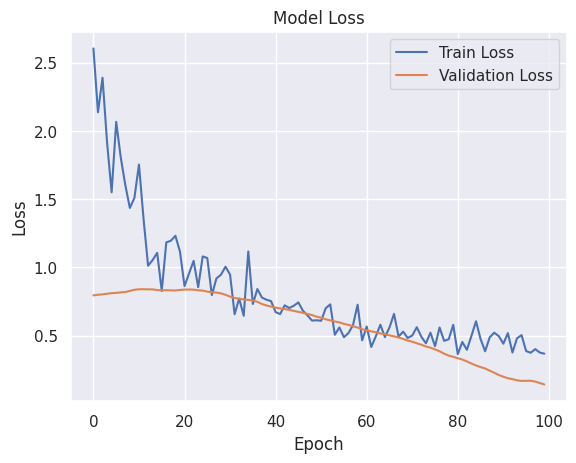

In [69]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate the model on test data
y_pred = model.predict(X_test1)

# Transform predictions back to original scale
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test1.reshape(-1, 1)).flatten()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, y_pred_original)
print('Mean Squared Error (Test Accuracy):', mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_original, y_pred_original)
print('Mean Absolute Error (Test Accuracy):', mae)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error (Test Accuracy):', rmse)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step
Mean Squared Error (Test Accuracy): 10.716825960969397
Mean Absolute Error (Test Accuracy): 2.5664488514682704
Root Mean Squared Error (Test Accuracy): 3.273656359633582


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


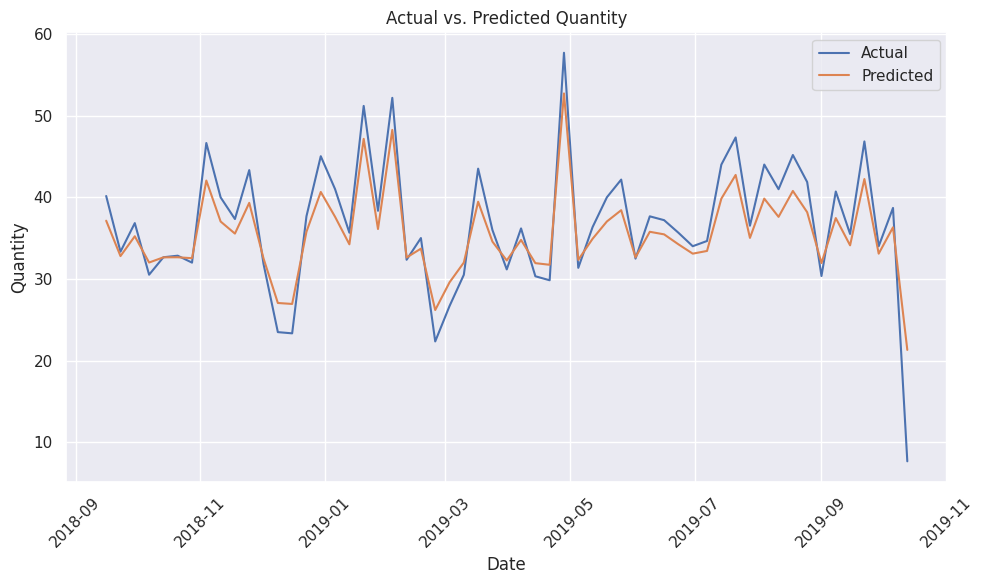

In [71]:
# Make predictions on the test data
predictions = model.predict(X_test1)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test1.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test1['datum'], actual_values, label='Actual')
plt.plot(test1['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

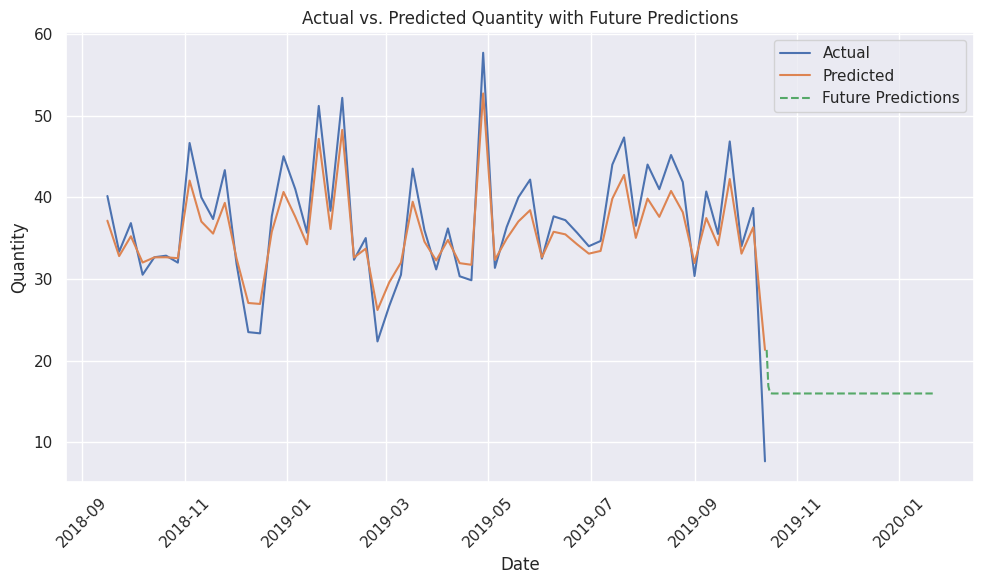

In [72]:
# Number of future time steps to predict
future_steps = 100  # Adjust as needed

# Prepare the last window of data from the test set to predict future values
last_window = X_test1[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model.predict(last_window)
    
    # Append the prediction to the list
    future_predictions.append(next_pred[0])
    
    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_pred

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test1['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test1['datum'], actual_values, label='Actual')
plt.plot(test1['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# M01AE

In [73]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [74]:
# Splitting data into train and test sets
split_index = 245
train2 = df_new2.iloc[:split_index]
test2 = df_new2.iloc[split_index:]

In [75]:
X_train2 = train2.drop(['datum'], axis=1).values
y_train2 = train2['Quantity'].values
X_test2 = test2.drop(['datum'], axis=1).values
y_test2 = test2['Quantity'].values

In [76]:
# Standardize features
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [77]:
# Normalize target variable
scaler_y = StandardScaler()
y_train2 = scaler_y.fit_transform(y_train2.reshape(-1, 1)).flatten()
y_test2 = scaler_y.transform(y_test2.reshape(-1, 1)).flatten()


In [78]:
# Split the data
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.3, random_state=42)

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras import regularizers

model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train2.shape[1], 1)),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(32, activation='tanh'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1)
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 2, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 2, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 2, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,769 (253.00 KB)

 Trainable params: 64,353 (251.38 KB)

 Non-trainable params: 416 (1.62 KB)

In [80]:
# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression

In [81]:
# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression
# Train the model
history = model.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_data=(X_val2, y_val2))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.7634 - val_loss: 1.0315
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.1438 - val_loss: 1.0268
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.9243 - val_loss: 1.0227
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.9198 - val_loss: 1.0185
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0840 - val_loss: 1.0143
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.9508 - val_loss: 1.0127
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4584 - val_loss: 1.0107
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3052 - val_loss: 1.0097
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3238 - val_loss: 1.0094
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2851 - val_loss: 1.0094
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0865 - val_loss: 1.0094
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3785 - val_lo

In [82]:
# Evaluate the model
train_loss2 = model.evaluate(X_train2, y_train2, verbose=0)
val_loss2 = model.evaluate(X_val2, y_val2, verbose=0)
print('Train Loss:', train_loss2)
print('Validation Loss:', val_loss2)

Train Loss: 0.1516994684934616
Validation Loss: 0.1835494041442871


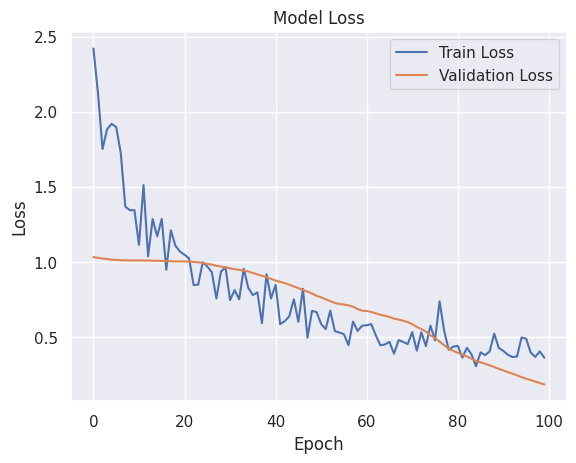

In [83]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [84]:
# Train the model
model.fit(X_train2, y_train2, epochs=100, batch_size=64, validation_data=(X_val2, y_val2), verbose=2)

Epoch 1/100
3/3 - 0s - 35ms/step - loss: 0.3428 - val_loss: 0.1586
Epoch 2/100
3/3 - 0s - 33ms/step - loss: 0.4140 - val_loss: 0.1533
Epoch 3/100
3/3 - 0s - 21ms/step - loss: 0.2777 - val_loss: 0.1501
Epoch 4/100
3/3 - 0s - 21ms/step - loss: 0.3700 - val_loss: 0.1453
Epoch 5/100
3/3 - 0s - 21ms/step - loss: 0.3409 - val_loss: 0.1399
Epoch 6/100
3/3 - 0s - 21ms/step - loss: 0.3344 - val_loss: 0.1363
Epoch 7/100
3/3 - 0s - 21ms/step - loss: 0.3530 - val_loss: 0.1334
Epoch 8/100
3/3 - 0s - 47ms/step - loss: 0.3626 - val_loss: 0.1293
Epoch 9/100
3/3 - 0s - 21ms/step - loss: 0.3773 - val_loss: 0.1264
Epoch 10/100
3/3 - 0s - 22ms/step - loss: 0.3228 - val_loss: 0.1244
Epoch 11/100
3/3 - 0s - 21ms/step - loss: 0.3605 - val_loss: 0.1218
Epoch 12/100
3/3 - 0s - 22ms/step - loss: 0.2949 - val_loss: 0.1197
Epoch 13/100
3/3 - 0s - 22ms/step - loss: 0.3741 - val_loss: 0.1173
Epoch 14/100
3/3 - 0s - 22ms/step - loss: 0.2581 - val_loss: 0.1157
Epoch 15/100
3/3 - 0s - 22ms/step - loss: 0.4206 - val_lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step


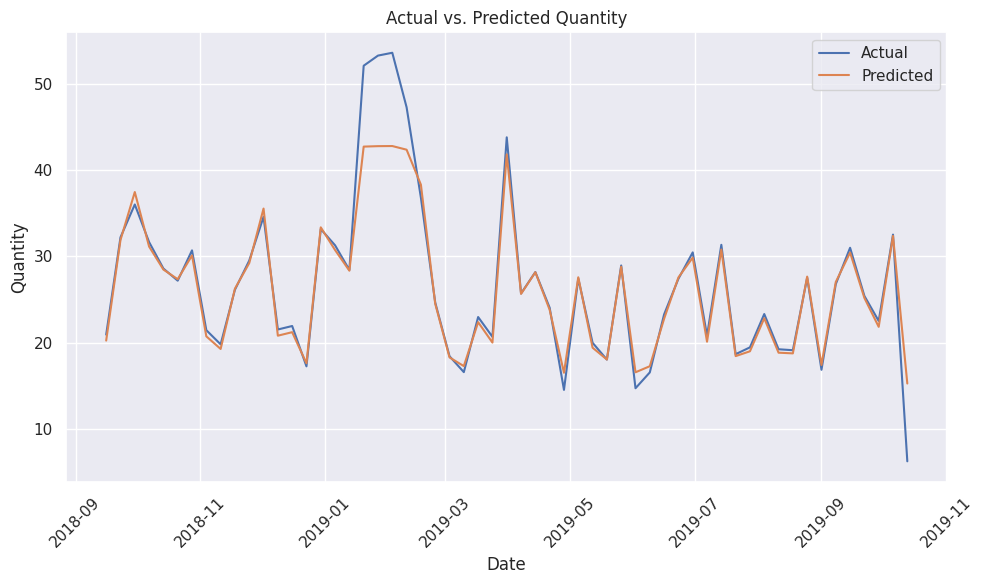

In [85]:
# Make predictions on the test data
predictions = model.predict(X_test2)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test2.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test2['datum'], actual_values, label='Actual')
plt.plot(test2['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

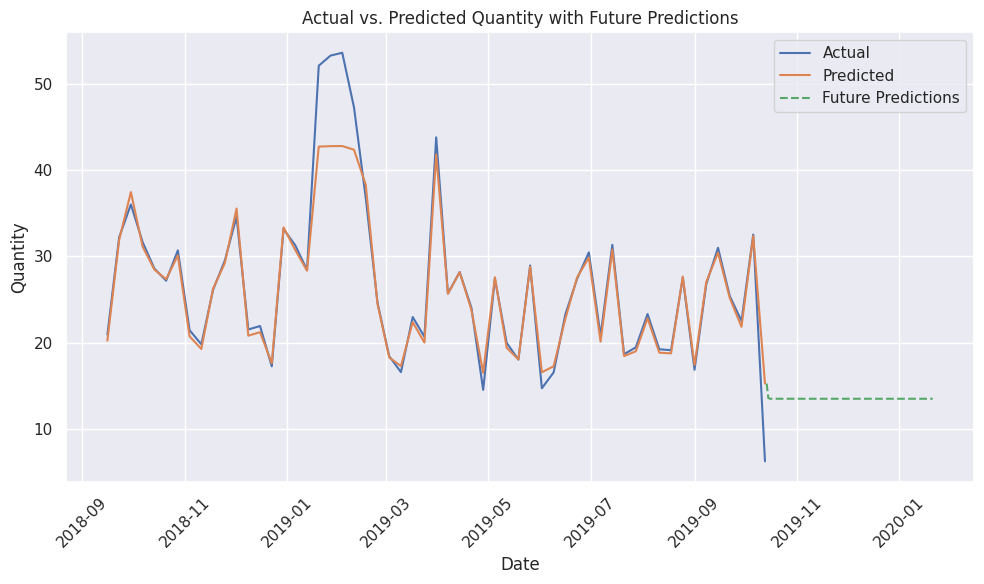

In [86]:
# Number of future time steps to predict
future_steps = 100  # Adjust as needed

# Prepare the last window of data from the test set to predict future values
last_window = X_test2[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model.predict(last_window)
    
    # Append the prediction to the list
    future_predictions.append(next_pred[0])
    
    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_pred

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test2['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test2['datum'], actual_values, label='Actual')
plt.plot(test2['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# N02BA

In [87]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [88]:
# Splitting data into train and test sets
split_index = 245
train3 = df_new3.iloc[:split_index]
test3 = df_new3.iloc[split_index:]

In [89]:
X_train3 = train3.drop(['datum'], axis=1).values
y_train3 = train3['Quantity'].values
X_test3 = test3.drop(['datum'], axis=1).values
y_test3 = test3['Quantity'].values

In [90]:
# Standardize features
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)

In [91]:
# Normalize target variable
scaler_y = StandardScaler()
y_train3 = scaler_y.fit_transform(y_train3.reshape(-1, 1)).flatten()
y_test3 = scaler_y.transform(y_test3.reshape(-1, 1)).flatten()

In [92]:
# Split the data
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size=0.3, random_state=42)

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras import regularizers

model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train3.shape[1], 1)),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(32, activation='tanh'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1)
])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 2, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 2, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 2, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 2, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,769 (253.00 KB)

 Trainable params: 64,353 (251.38 KB)

 Non-trainable params: 416 (1.62 KB)

In [94]:
# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression

In [95]:
# Train the model
history = model.fit(X_train3, y_train3, epochs=100, batch_size=32, validation_data=(X_val3, y_val3))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 3.3712 - val_loss: 0.7461
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.9722 - val_loss: 0.7508
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.4999 - val_loss: 0.7548
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0538 - val_loss: 0.7609
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0240 - val_loss: 0.7610
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5903 - val_loss: 0.7661
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.9828 - val_loss: 0.7723
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4876 - val_loss: 0.7770
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4843 - val_loss: 0.7806
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3546 - val_loss: 0.7836
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.9053 - val_loss: 0.7837
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5321 - val_lo

In [96]:
# Evaluate the model
train_loss3 = model.evaluate(X_train3, y_train3, verbose=0)
val_loss3 = model.evaluate(X_val3, y_val3, verbose=0)
print('Train Loss:', train_loss3)
print('Validation Loss:', val_loss3)

Train Loss: 0.20667093992233276
Validation Loss: 0.15658578276634216


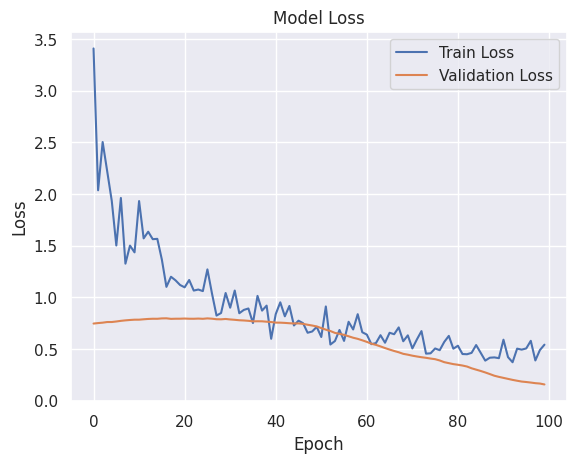

In [97]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate the model on test data
y_pred = model.predict(X_test3)

# Transform predictions back to original scale
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test3.reshape(-1, 1)).flatten()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, y_pred_original)
print('Mean Squared Error (Test Accuracy):', mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_original, y_pred_original)
print('Mean Absolute Error (Test Accuracy):', mae)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error (Test Accuracy):', rmse)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step
Mean Squared Error (Test Accuracy): 11.105317408249409
Mean Absolute Error (Test Accuracy): 2.698898790593733
Root Mean Squared Error (Test Accuracy): 3.3324641645859314


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


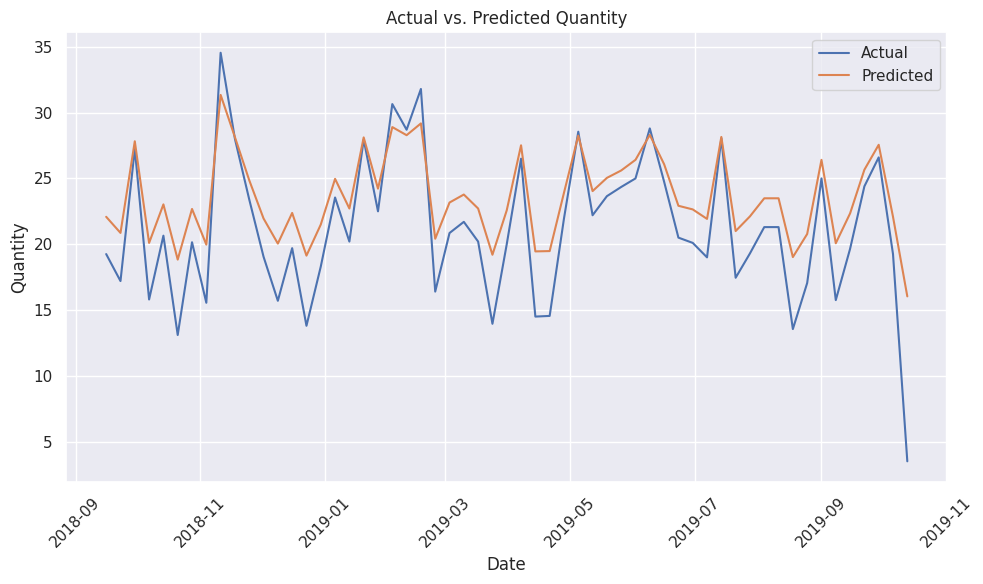

In [99]:
# Make predictions on the test data
predictions = model.predict(X_test3)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test3.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test3['datum'], actual_values, label='Actual')
plt.plot(test3['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

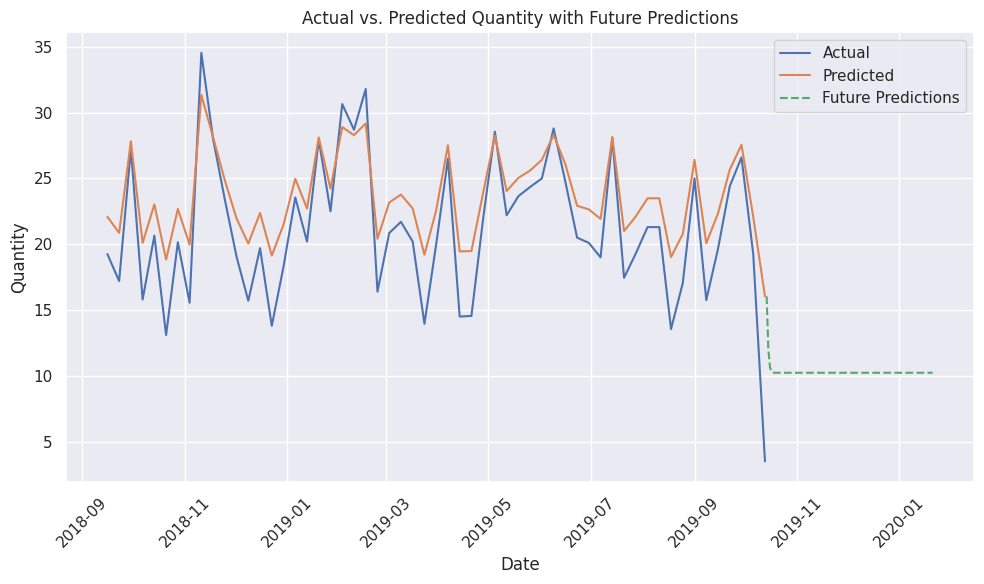

In [100]:
# Number of future time steps to predict
future_steps = 100  # Adjust as needed

# Prepare the last window of data from the test set to predict future values
last_window = X_test3[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model.predict(last_window)
    
    # Append the prediction to the list
    future_predictions.append(next_pred[0])
    
    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_pred

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test3['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test3['datum'], actual_values, label='Actual')
plt.plot(test3['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# N02BE

In [101]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [102]:
# Splitting data into train and test sets
split_index = 245
train4 = df_new4.iloc[:split_index]
test4 = df_new4.iloc[split_index:]

In [103]:
X_train4 = train4.drop(['datum'], axis=1).values
y_train4 = train4['Quantity'].values
X_test4 = test4.drop(['datum'], axis=1).values
y_test4 = test4['Quantity'].values

In [104]:
# Standardize features
scaler = StandardScaler()
X_train4 = scaler.fit_transform(X_train4)
X_test4 = scaler.transform(X_test4)

In [105]:
# Normalize target variable
scaler_y = StandardScaler()
y_train4 = scaler_y.fit_transform(y_train4.reshape(-1, 1)).flatten()
y_test4 = scaler_y.transform(y_test4.reshape(-1, 1)).flatten()

In [106]:
# Split the data
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train4, y_train4, test_size=0.3, random_state=42)

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Define the model
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train4.shape[1], 1)),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(32, activation='tanh'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train4, y_train4, epochs=100, batch_size=64, validation_data=(X_val4, y_val4), callbacks=[early_stopping], verbose=1)

# Evaluate the model on test data
test_loss = model.evaluate(X_test4, y_test4)
print("Test Loss:", test_loss)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - loss: 1.9650 - val_loss: 1.0676
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.8223 - val_loss: 1.0662
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.1246 - val_loss: 1.0643
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.4437 - val_loss: 1.0629
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.6576 - val_loss: 1.0613
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.5856 - val_loss: 1.0617
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.4594 - val_loss: 1.0629
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.1142 - val_loss: 1.0643
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.3925 - val_loss: 1.0644
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.2368 - val_loss: 1.0642
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.2257 - val_loss: 1.0642
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0966 - val_l

In [108]:
# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression

In [109]:
# Train the model
history = model.fit(X_train4, y_train4, epochs=100, batch_size=32, validation_data=(X_val4, y_val4))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 1.4697 - val_loss: 1.0938
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3392 - val_loss: 1.0930
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4020 - val_loss: 1.0919
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1793 - val_loss: 1.0925
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2961 - val_loss: 1.0925
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1805 - val_loss: 1.0944
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0432 - val_loss: 1.0966
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9741 - val_loss: 1.1012
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9820 - val_loss: 1.1054
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0404 - val_loss: 1.1085
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3286 - val_loss: 1.1063
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8624 - val_lo

In [110]:
# Evaluate the model
train_loss4 = model.evaluate(X_train4, y_train4, verbose=0)
val_loss4 = model.evaluate(X_val4, y_val4, verbose=0)
print('Train Loss:', train_loss4)
print('Validation Loss:', val_loss4)

Train Loss: 0.16772781312465668
Validation Loss: 0.22112922370433807


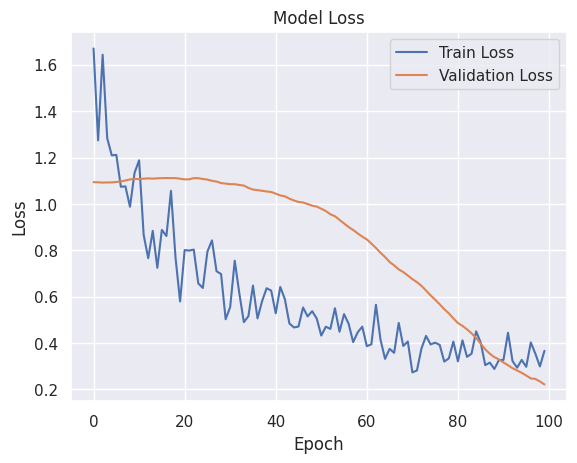

In [111]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step


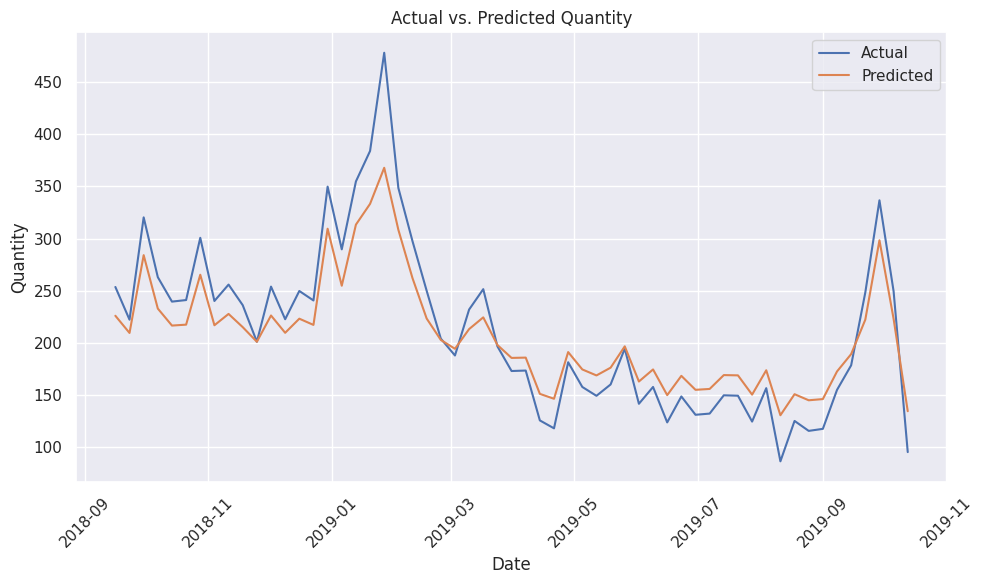

In [112]:
# Make predictions on the test data
predictions = model.predict(X_test4)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test4.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test4['datum'], actual_values, label='Actual')
plt.plot(test4['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

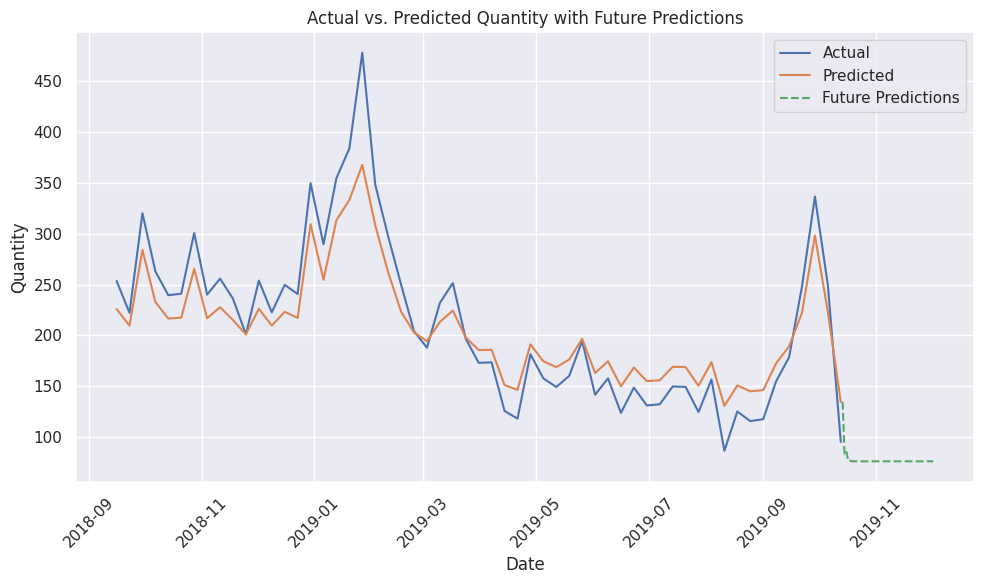

In [113]:
# Number of future time steps to predict
future_steps = 50  # Adjust as needed

# Prepare the last window of data from the test set to predict future values
last_window = X_test4[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively while maintaining the trend
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model.predict(last_window)
    
    # Append the prediction to the list
    future_predictions.append(next_pred[0])
    
    # Extend the last window by adding the prediction at the end
    last_window = np.append(last_window[:, 1:], next_pred).reshape(1, -1)

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test4['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test4['datum'], actual_values, label='Actual')
plt.plot(test4['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# N05B

In [114]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [115]:
# Splitting data into train and test sets
split_index = 245
train5 = df_new5.iloc[:split_index]
test5 = df_new5.iloc[split_index:]

In [116]:
X_train5 = train5.drop(['datum'], axis=1).values
y_train5 = train5['Quantity'].values
X_test5 = test5.drop(['datum'], axis=1).values
y_test5 = test5['Quantity'].values

In [117]:
# Standardize features
scaler = StandardScaler()
X_train5 = scaler.fit_transform(X_train5)
X_test5 = scaler.transform(X_test5)

In [118]:
# Normalize target variable
scaler_y = StandardScaler()
y_train5 = scaler_y.fit_transform(y_train5.reshape(-1, 1)).flatten()
y_test5 = scaler_y.transform(y_test5.reshape(-1, 1)).flatten()

In [119]:
# Split the data
X_train5, X_val5, y_train5, y_val5 = train_test_split(X_train5, y_train5, test_size=0.3, random_state=42)

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train5.shape[1], 1)),
    Dropout(0.5),
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.5),
    LSTM(32, activation='tanh'),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(1)
])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 2, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 2, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,609 (518.00 KB)

 Trainable params: 132,609 (518.00 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression

In [122]:
# Train the model
history = model.fit(X_train5, y_train5, epochs=100, batch_size=32, validation_data=(X_val5, y_val5))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 1.7063 - val_loss: 1.8197
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6976 - val_loss: 1.7621
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6794 - val_loss: 1.7067
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6823 - val_loss: 1.6510
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5257 - val_loss: 1.5966
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5998 - val_loss: 1.5381
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4982 - val_loss: 1.4751
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2506 - val_loss: 1.4013
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4071 - val_loss: 1.3100
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1918 - val_loss: 1.1849
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1832 - val_loss: 1.0188
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0673 - val_lo

In [123]:
# Evaluate the model
train_loss5 = model.evaluate(X_train5, y_train5, verbose=0)
val_loss5 = model.evaluate(X_val5, y_val5, verbose=0)
print('Train Loss:', train_loss5)
print('Validation Loss:', val_loss5)

Train Loss: 0.08926261216402054
Validation Loss: 0.11635904759168625


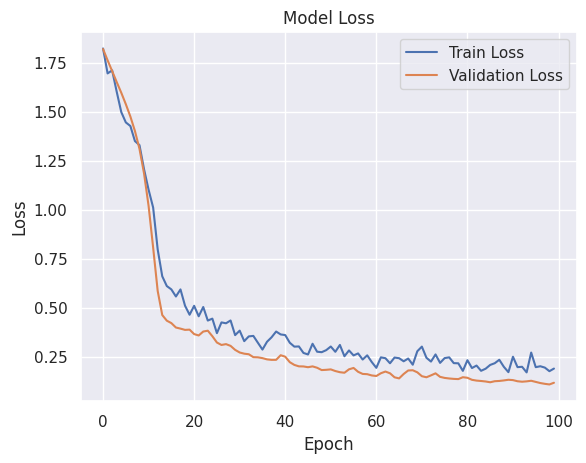

In [124]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


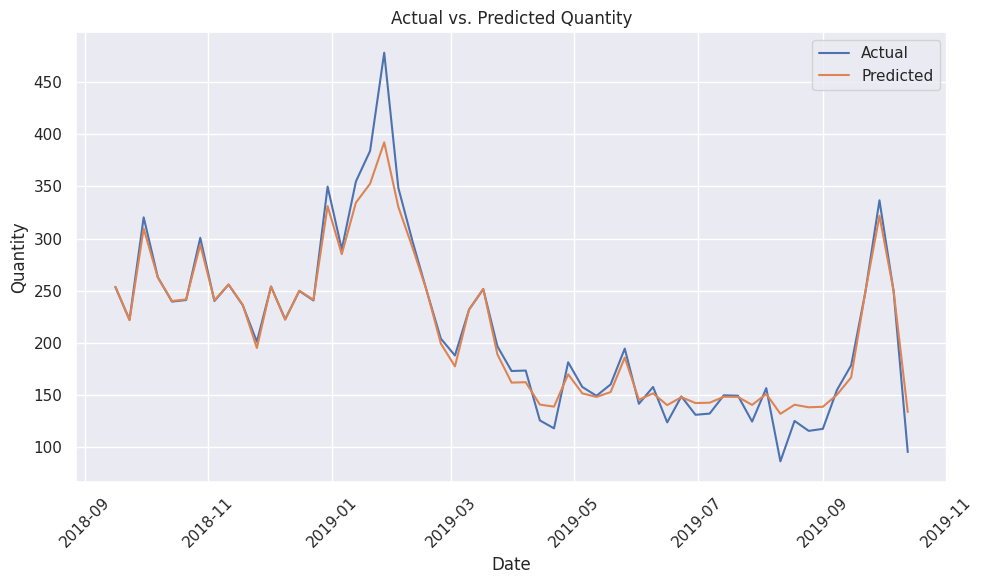

In [125]:
# Make predictions on the test data
predictions = model.predict(X_test5)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test5.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test5['datum'], actual_values, label='Actual')
plt.plot(test5['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

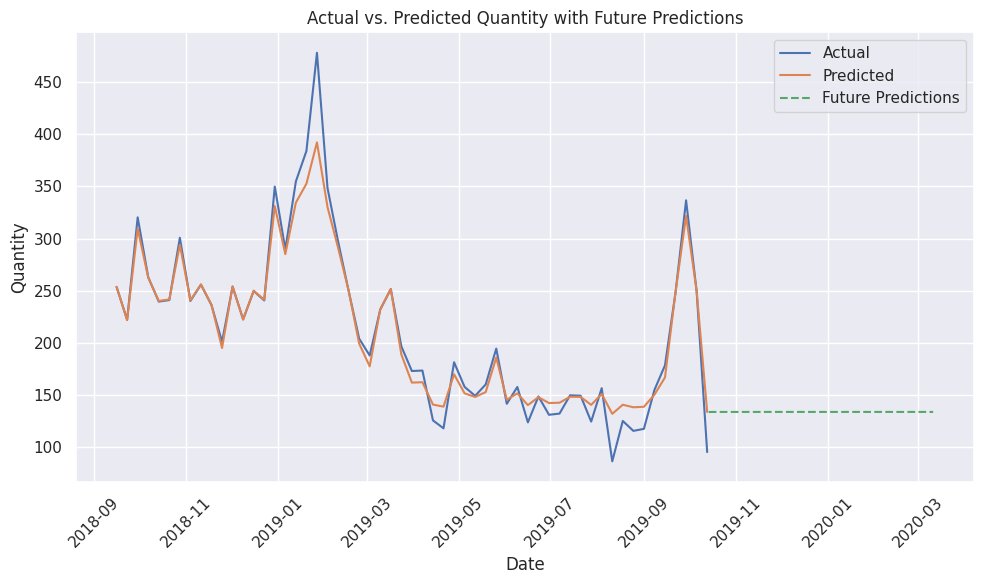

In [126]:
# Number of future time steps to predict
future_steps = 150  # Adjust as needed

# Prepare the last window of data from the test set to predict future values
last_window = X_test5[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model.predict(last_window)
    
    # Append the prediction to the list
    future_predictions.append(next_pred[0])
    
    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_pred

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test5['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test5['datum'], actual_values, label='Actual')
plt.plot(test5['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# N05C

In [127]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [128]:
# Splitting data into train and test sets
split_index = 245
train6 = df_new6.iloc[:split_index]
test6 = df_new6.iloc[split_index:]

In [129]:
X_train6 = train6.drop(['datum'], axis=1).values
y_train6 = train6['Quantity'].values
X_test6 = test6.drop(['datum'], axis=1).values
y_test6 = test6['Quantity'].values

In [130]:
# Standardize features
scaler = StandardScaler()
X_train6 = scaler.fit_transform(X_train6)
X_test6 = scaler.transform(X_test6)

In [131]:
# Normalize target variable
scaler_y = StandardScaler()
y_train6 = scaler_y.fit_transform(y_train6.reshape(-1, 1)).flatten()
y_test6 = scaler_y.transform(y_test6.reshape(-1, 1)).flatten()

In [132]:
# Split the data
X_train6, X_val6, y_train6, y_val6 = train_test_split(X_train6, y_train6, test_size=0.3, random_state=42)

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras import regularizers

model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train1.shape[1], 1)),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(32, activation='tanh'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1)
])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 2, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 2, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 2, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 2, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,769 (253.00 KB)

 Trainable params: 64,353 (251.38 KB)

 Non-trainable params: 416 (1.62 KB)

In [134]:
# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression

In [135]:
# Train the model
history = model.fit(X_train6, y_train6, epochs=100, batch_size=32, validation_data=(X_val6, y_val6))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.3957 - val_loss: 1.2505
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.8463 - val_loss: 1.2466
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0089 - val_loss: 1.2442
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4708 - val_loss: 1.2409
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3701 - val_loss: 1.2411
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5755 - val_loss: 1.2412
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3635 - val_loss: 1.2430
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0749 - val_loss: 1.2437
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0536 - val_loss: 1.2433
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9431 - val_loss: 1.2430
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1932 - val_loss: 1.2441
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0270 - val_lo

In [136]:
# Evaluate the model
train_loss6 = model.evaluate(X_train6, y_train6, verbose=0)
val_loss6 = model.evaluate(X_val6, y_val6, verbose=0)
print('Train Loss:', train_loss6)
print('Validation Loss:', val_loss6)

Train Loss: 0.18826834857463837
Validation Loss: 0.21135897934436798


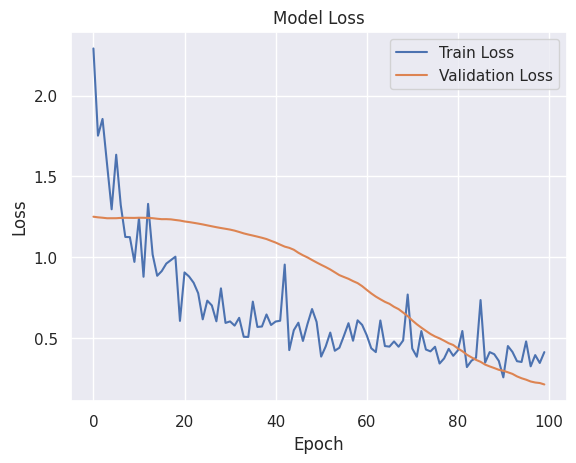

In [137]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [138]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate the model on test data
y_pred = model.predict(X_test6)

# Transform predictions back to original scale
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test1.reshape(-1, 1)).flatten()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, y_pred_original)
print('Mean Squared Error (Test Accuracy):', mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_original, y_pred_original)
print('Mean Absolute Error (Test Accuracy):', mae)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error (Test Accuracy):', rmse)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step
Mean Squared Error (Test Accuracy): 10.052043744472627
Mean Absolute Error (Test Accuracy): 2.4933029250713097
Root Mean Squared Error (Test Accuracy): 3.170495819974003


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


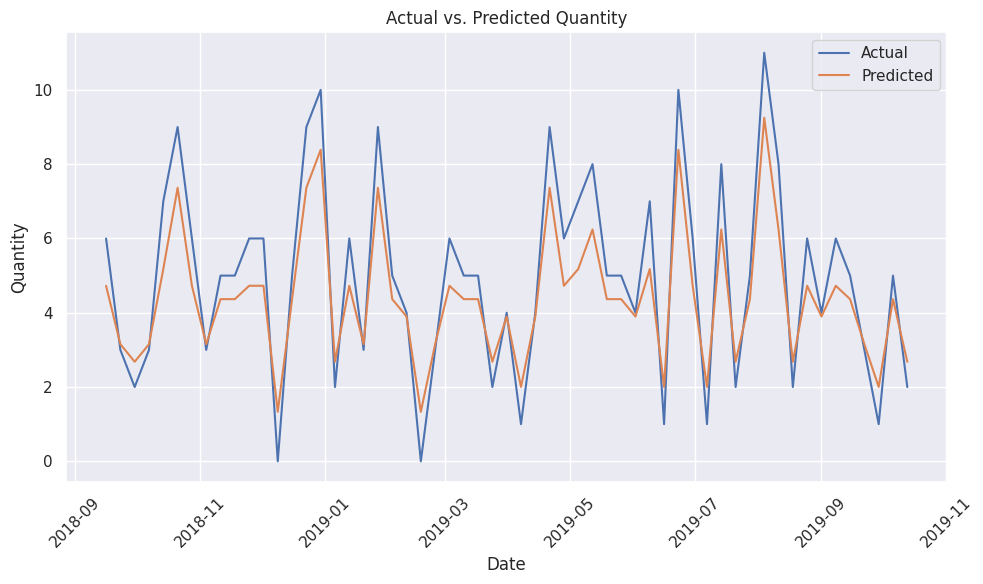

In [139]:
# Make predictions on the test data
predictions = model.predict(X_test6)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test6.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test6['datum'], actual_values, label='Actual')
plt.plot(test6['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


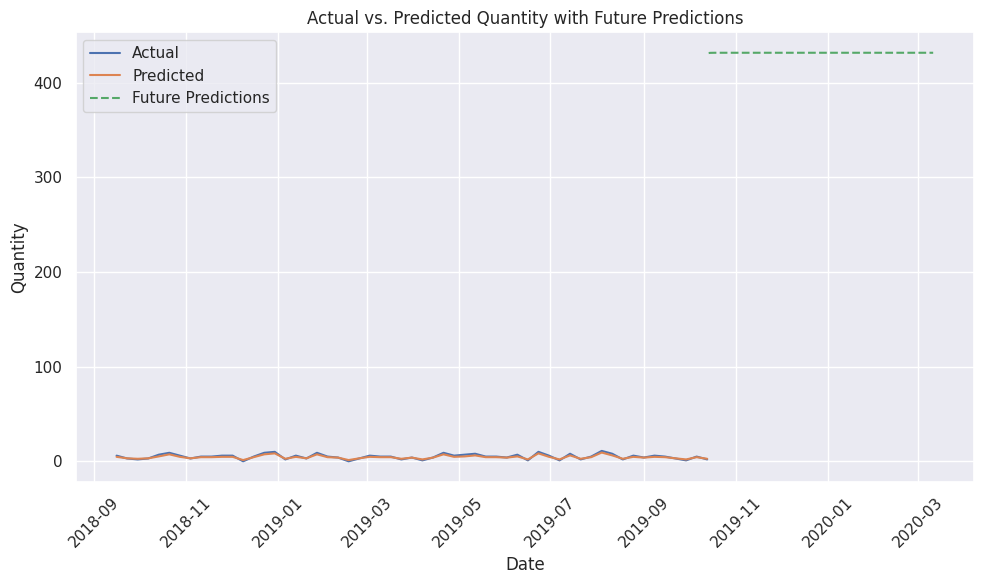

In [140]:
# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Ensure predicted values are non-negative
future_predictions = np.maximum(future_predictions, 0)

# Generate future dates for plotting
last_date = pd.to_datetime(test6['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test6['datum'], actual_values, label='Actual')
plt.plot(test6['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# R03

In [141]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [142]:
# Splitting data into train and test sets
split_index = 245
train7 = df_new7.iloc[:split_index]
test7 = df_new7.iloc[split_index:]

In [143]:
X_train7 = train7.drop(['datum'], axis=1).values
y_train7 = train7['Quantity'].values
X_test7 = test7.drop(['datum'], axis=1).values
y_test7 = test7['Quantity'].values

In [144]:
# Standardize features
scaler = StandardScaler()
X_train7 = scaler.fit_transform(X_train7)
X_test7 = scaler.transform(X_test7)

In [145]:
# Normalize target variable
scaler_y = StandardScaler()
y_train7 = scaler_y.fit_transform(y_train7.reshape(-1, 1)).flatten()
y_test7 = scaler_y.transform(y_test7.reshape(-1, 1)).flatten()

In [146]:
# Split the data
X_train7, X_val7, y_train7, y_val7 = train_test_split(X_train7, y_train7, test_size=0.3, random_state=42)

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_train6.shape[1], 1)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [148]:
# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression

In [149]:
# Train the model
history = model.fit(X_train7, y_train7, epochs=100, batch_size=32, validation_data=(X_val7, y_val7))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.8676 - val_loss: 1.2986
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7996 - val_loss: 1.1704
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7761 - val_loss: 1.0515
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6371 - val_loss: 0.9354
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6082 - val_loss: 0.8171
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4532 - val_loss: 0.6963
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3039 - val_loss: 0.5730
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2636 - val_loss: 0.4527
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1848 - val_loss: 0.3388
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1483 - val_loss: 0.2308
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0940 - val_loss: 0.1458
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0449 - val_loss: 0.0903


In [150]:
# Evaluate the model
train_loss7 = model.evaluate(X_train7, y_train7, verbose=0)
val_loss7 = model.evaluate(X_val7, y_val7, verbose=0)
print('Train Loss:', train_loss7)
print('Validation Loss:', val_loss7)

Train Loss: 6.217874761205167e-05
Validation Loss: 8.032323967199773e-05


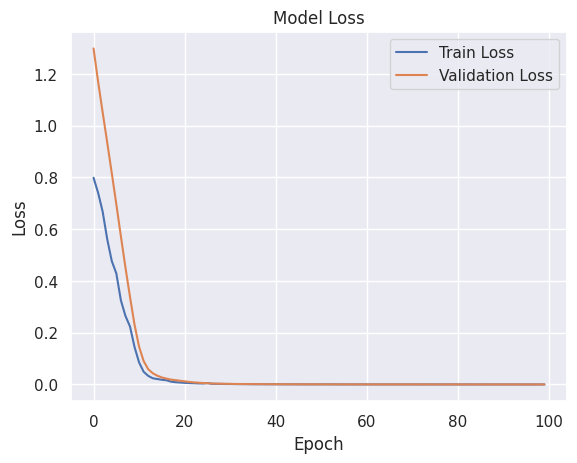

In [151]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


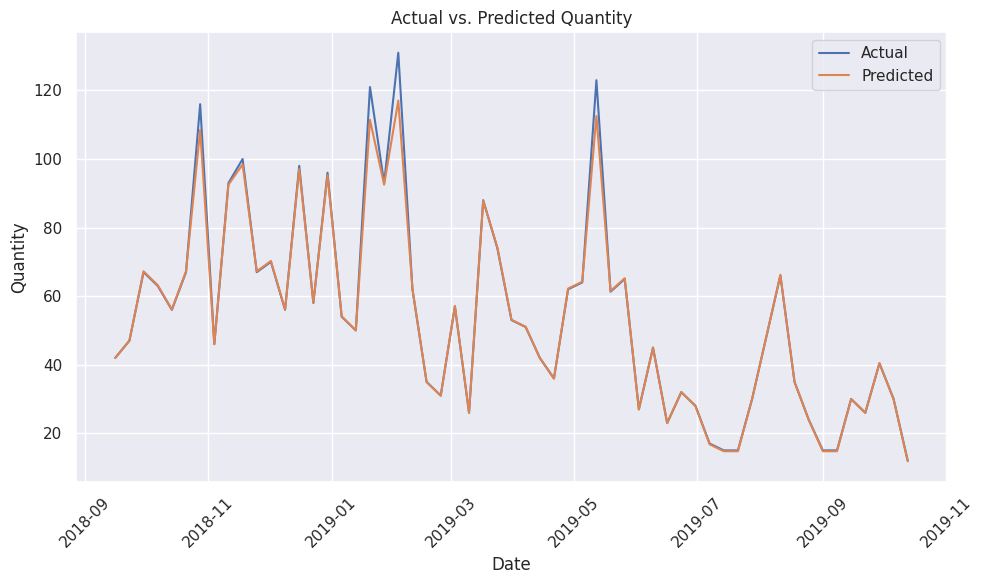

In [152]:
# Make predictions on the test data
predictions = model.predict(X_test7)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test7.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test7['datum'], actual_values, label='Actual')
plt.plot(test7['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

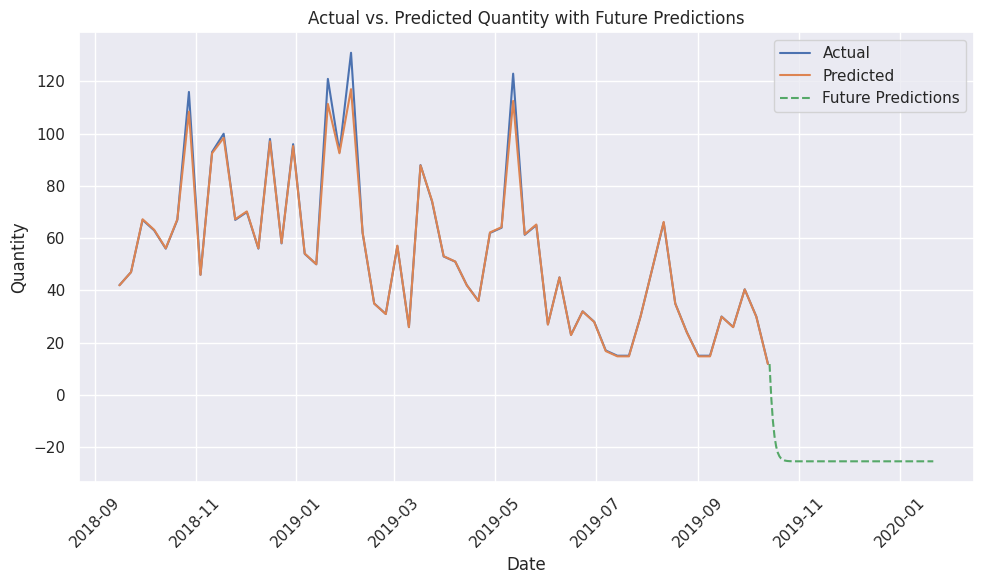

In [153]:
# Number of future time steps to predict
future_steps = 100  # Adjust as needed

# Prepare the last window of data from the test set to predict future values
last_window = X_test7[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model.predict(last_window)
    
    # Append the prediction to the list
    future_predictions.append(next_pred[0])
    
    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_pred

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test7['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test7['datum'], actual_values, label='Actual')
plt.plot(test7['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# R06

In [154]:
# Function to prepare data
def prepare_data(time_data, n_features):
    X, y = [], []
    for i in range(len(time_data)):
        end_ix = i + n_features
        if end_ix > (len(time_data) - 1):
            break
        seq_x, seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [155]:
# Splitting data into train and test sets
split_index = 245
train8 = df_new8.iloc[:split_index]
test8 = df_new8.iloc[split_index:]

In [156]:
X_train8 = train8.drop(['datum'], axis=1).values
y_train8 = train8['Quantity'].values
X_test8 = test8.drop(['datum'], axis=1).values
y_test8 = test8['Quantity'].values

In [157]:
# Standardize features
scaler = StandardScaler()
X_train8 = scaler.fit_transform(X_train8)
X_test8 = scaler.transform(X_test8)

In [158]:
# Normalize target variable
scaler_y = StandardScaler()
y_train8 = scaler_y.fit_transform(y_train8.reshape(-1, 1)).flatten()
y_test8 = scaler_y.transform(y_test8.reshape(-1, 1)).flatten()

In [159]:
# Split the data
X_train8, X_val8, y_train8, y_val8 = train_test_split(X_train8, y_train8, test_size=0.3, random_state=42)

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras import regularizers

model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train8.shape[1], 1)),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(32, activation='tanh'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1)
])

model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                  │ (None, 2, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 2, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 2, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 2, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,769 (253.00 KB)

 Trainable params: 64,353 (251.38 KB)

 Non-trainable params: 416 (1.62 KB)

In [161]:
# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression

In [162]:
# Train the model
history = model.fit(X_train8, y_train8, epochs=100, batch_size=32, validation_data=(X_val8, y_val8))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 3.4141 - val_loss: 1.1584
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.2339 - val_loss: 1.1556
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.7179 - val_loss: 1.1543
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.6508 - val_loss: 1.1533
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5757 - val_loss: 1.1524
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.7689 - val_loss: 1.1512
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4875 - val_loss: 1.1513
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.8144 - val_loss: 1.1532
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1988 - val_loss: 1.1515
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4915 - val_loss: 1.1520
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3453 - val_loss: 1.1545
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4776 - val_lo

In [163]:
# Evaluate the model
train_loss8 = model.evaluate(X_train8, y_train8, verbose=0)
val_loss8 = model.evaluate(X_val8, y_val8, verbose=0)
print('Train Loss:', train_loss8)
print('Validation Loss:', val_loss8)

Train Loss: 0.14876851439476013
Validation Loss: 0.1903068572282791


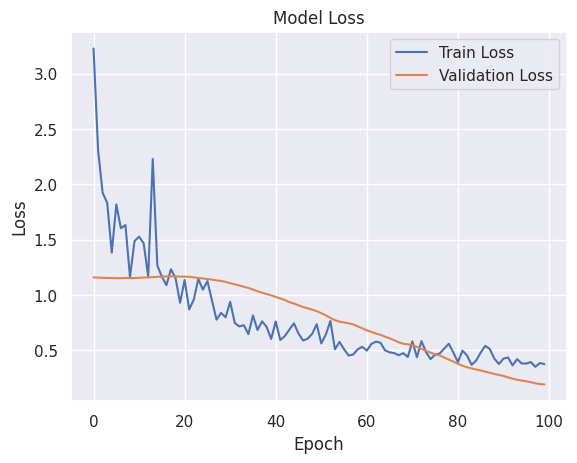

In [164]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step


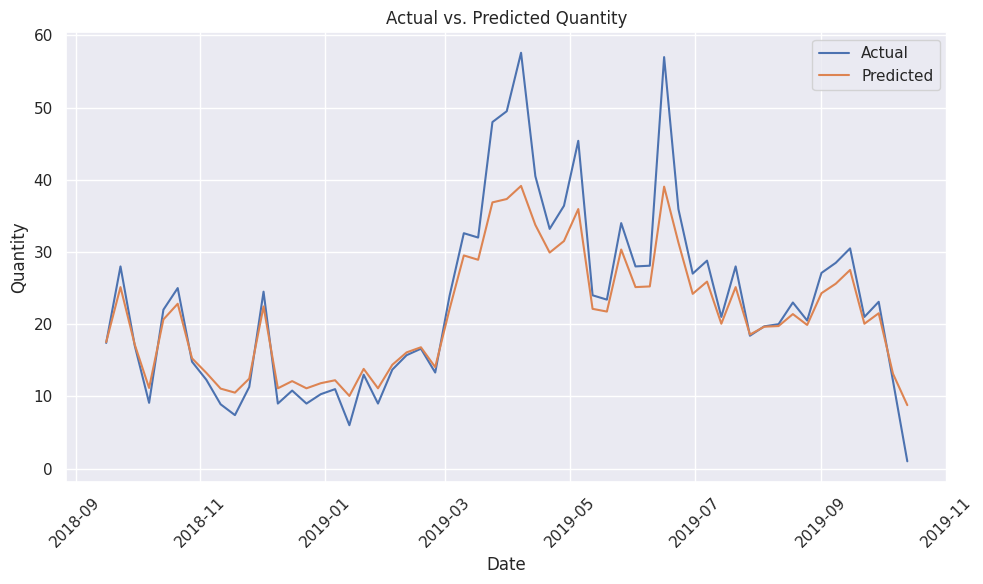

In [165]:
# Make predictions on the test data
predictions = model.predict(X_test8)

# Inverse transform the predictions
predicted_values = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the actual values
actual_values = scaler_y.inverse_transform(y_test8.reshape(-1, 1)).flatten()

# Plot actual vs. predicted values with 'datum' on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test8['datum'], actual_values, label='Actual')
plt.plot(test8['datum'], predicted_values, label='Predicted')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

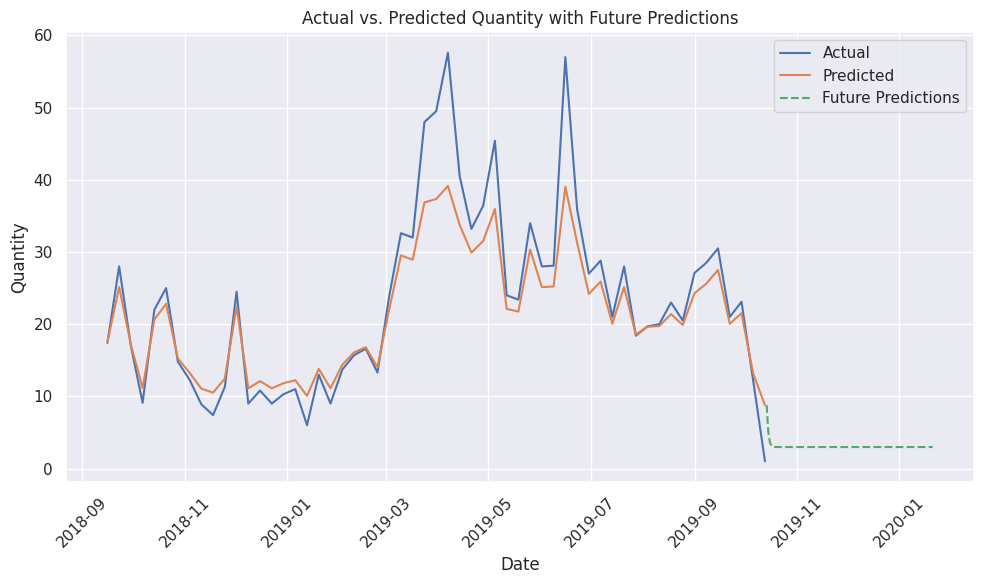

In [166]:
# Number of future time steps to predict
future_steps = 100  # Adjust as needed

# Prepare the last window of data from the test set to predict future values
last_window = X_test8[-1].reshape(1, -1)  # Reshape to match model input shape

# Predict future values iteratively
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model.predict(last_window)
    
    # Append the prediction to the list
    future_predictions.append(next_pred[0])
    
    # Update the last window by removing the first element and adding the prediction
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_pred

# Inverse transform the predicted future values
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate future dates for plotting
last_date = pd.to_datetime(test8['datum'].iloc[-1])
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_steps + 1)]

# Plot actual vs. predicted values with future predictions
plt.figure(figsize=(10, 6))
plt.plot(test8['datum'], actual_values, label='Actual')
plt.plot(test8['datum'], predicted_values, label='Predicted')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title('Actual vs. Predicted Quantity with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()